# Import

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt



#load MNIST dataset 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Parameters

In [5]:
#Network Hidden Layers Parameters
n_hidden_1 = 200
n_hidden_2 = 300

#Input and Output Layers Parameters
input_size = 784
output_size = 10

#change it to your own path 
#log_files_path = './checkpoints/'
log_files_path = 'C:/Users/Ali/logs/'

# Definition of the Layer Function

In [6]:
def layer(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    print('inside layer')
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    
    #initialization of the weights
    w_0 = tf.random_normal_initializer(stddev=w_std)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    # different activation functions
    # you can try either 

    #return tf.nn.relu(tf.matmul(x, W) + b)
    return tf.matmul(x, W) + b

# Define Inference Function

In [7]:
def inference(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
    
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layer(hidden_2, [n_hidden_2, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

# Define Loss Function

In [8]:
def loss(output, y):
    """
    Computes softmax cross entropy between logits and labels and then the loss 
    
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

# Main 

inside layer
inside layer
inside layer
INFO:tensorflow:Restoring parameters from C:/Users/Ali/logs/multi_layer/model-checkpoint-89100
inside layer
inside layer
inside layer
[6.1301293, 2.600596]


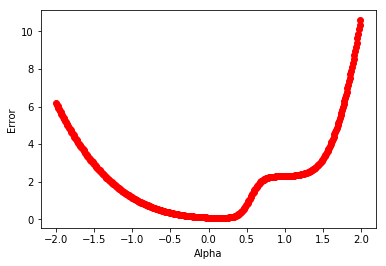

In [9]:
            
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

#defines a session
sess = tf.Session()






with tf.variable_scope("multi_layer", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference(x)
    
    #compute the cost 
    cost_opt = loss(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path + 'multi_layer/model-checkpoint-89100')



    
    
    
    
with tf.variable_scope("multi_layer_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference(x)
    #compute the rand cost
    cost_rand = loss(output_rand, y)
    
    var_list_rand = ["hidden_layer_1/W", "hidden_layer_1/b", 
                     "hidden_layer_2/W", "hidden_layer_2/b", 
                     "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}






#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))





with tf.variable_scope("multi_layer_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    #
    o_W_inter  = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    o_b_inter  = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h1_inter = tf.nn.relu(tf.matmul(x,        h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.relu(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    o_inter  = tf.nn.relu(tf.matmul(h2_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)
       
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter(log_files_path + 'linear_interpolation_1/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: mnist.test.images,
            y: mnist.test.labels,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()